## Link Prediction: an introduction

Made for the network science course @ DCC/FCUP

See also: - [NetworkX - Link Prediction](https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html) 

In [106]:
import networkx as nx
import operator as op

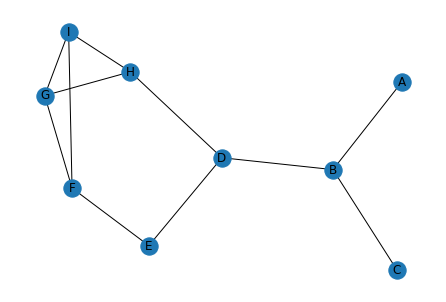

In [93]:
G = nx.Graph()
edge_list = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('D', 'H'),
('H', 'G'), ('E', 'F'), ('G','F'), ('F', 'I'), ('H', 'I'), ('G', 'I')]
G.add_edges_from(edge_list)
nx.draw(G, with_labels=True)

### Number of Common Neighbors

In [96]:
common_neigh = [(e[0], e[1], len(list(nx.common_neighbors(G, e[0], e[1]))))
                for e in nx.non_edges(G)]
common_neigh = sorted(common_neigh, key=op.itemgetter(2), reverse=True)

print(common_neigh)


[('H', 'F', 2), ('B', 'H', 1), ('B', 'E', 1), ('A', 'D', 1), ('A', 'C', 1), ('D', 'G', 1), ('D', 'F', 1), ('D', 'C', 1), ('D', 'I', 1), ('H', 'E', 1), ('I', 'E', 1), ('G', 'E', 1), ('B', 'F', 0), ('B', 'I', 0), ('B', 'G', 0), ('A', 'H', 0), ('A', 'E', 0), ('A', 'F', 0), ('A', 'G', 0), ('A', 'I', 0), ('H', 'C', 0), ('C', 'G', 0), ('C', 'E', 0), ('C', 'F', 0), ('C', 'I', 0)]


### Jaccard Coefficient

In [97]:
jacc_coeff = list(nx.jaccard_coefficient(G))
jacc_coeff.sort(key=op.itemgetter(2), reverse=True)

print(jacc_coeff)

[('A', 'C', 1.0), ('H', 'F', 0.5), ('A', 'D', 0.3333333333333333), ('D', 'C', 0.3333333333333333), ('B', 'E', 0.25), ('H', 'E', 0.25), ('I', 'E', 0.25), ('G', 'E', 0.25), ('B', 'H', 0.2), ('D', 'G', 0.2), ('D', 'F', 0.2), ('D', 'I', 0.2), ('B', 'F', 0.0), ('B', 'I', 0.0), ('B', 'G', 0.0), ('A', 'H', 0.0), ('A', 'E', 0.0), ('A', 'F', 0.0), ('A', 'G', 0.0), ('A', 'I', 0.0), ('H', 'C', 0.0), ('C', 'G', 0.0), ('C', 'E', 0.0), ('C', 'F', 0.0), ('C', 'I', 0.0)]


### Resource Allocation Index

In [98]:
res_alloc = list(nx.resource_allocation_index(G))
res_alloc.sort(key=op.itemgetter(2), reverse=True)

print(res_alloc)

[('H', 'F', 0.6666666666666666), ('D', 'F', 0.5), ('B', 'H', 0.3333333333333333), ('B', 'E', 0.3333333333333333), ('A', 'D', 0.3333333333333333), ('A', 'C', 0.3333333333333333), ('D', 'G', 0.3333333333333333), ('D', 'C', 0.3333333333333333), ('D', 'I', 0.3333333333333333), ('H', 'E', 0.3333333333333333), ('I', 'E', 0.3333333333333333), ('G', 'E', 0.3333333333333333), ('B', 'F', 0), ('B', 'I', 0), ('B', 'G', 0), ('A', 'H', 0), ('A', 'E', 0), ('A', 'F', 0), ('A', 'G', 0), ('A', 'I', 0), ('H', 'C', 0), ('C', 'G', 0), ('C', 'E', 0), ('C', 'F', 0), ('C', 'I', 0)]


### Adamic-Adar Index

In [99]:
adamic_adar = list(nx.adamic_adar_index(G))
adamic_adar.sort(key=op.itemgetter(2), reverse=True)

print(adamic_adar)

[('H', 'F', 1.8204784532536746), ('D', 'F', 1.4426950408889634), ('B', 'H', 0.9102392266268373), ('B', 'E', 0.9102392266268373), ('A', 'D', 0.9102392266268373), ('A', 'C', 0.9102392266268373), ('D', 'G', 0.9102392266268373), ('D', 'C', 0.9102392266268373), ('D', 'I', 0.9102392266268373), ('H', 'E', 0.9102392266268373), ('I', 'E', 0.9102392266268373), ('G', 'E', 0.9102392266268373), ('B', 'F', 0), ('B', 'I', 0), ('B', 'G', 0), ('A', 'H', 0), ('A', 'E', 0), ('A', 'F', 0), ('A', 'G', 0), ('A', 'I', 0), ('H', 'C', 0), ('C', 'G', 0), ('C', 'E', 0), ('C', 'F', 0), ('C', 'I', 0)]


### Preferential Attachment Score

In [100]:
pref_attach = list(nx.preferential_attachment(G))
pref_attach.sort(key=op.itemgetter(2), reverse=True)

print(pref_attach)

[('B', 'H', 9), ('B', 'F', 9), ('B', 'I', 9), ('B', 'G', 9), ('D', 'G', 9), ('D', 'F', 9), ('D', 'I', 9), ('H', 'F', 9), ('B', 'E', 6), ('H', 'E', 6), ('I', 'E', 6), ('G', 'E', 6), ('A', 'D', 3), ('A', 'H', 3), ('A', 'F', 3), ('A', 'G', 3), ('A', 'I', 3), ('D', 'C', 3), ('H', 'C', 3), ('C', 'G', 3), ('C', 'F', 3), ('C', 'I', 3), ('A', 'E', 2), ('C', 'E', 2), ('A', 'C', 1)]


### Community-based measures

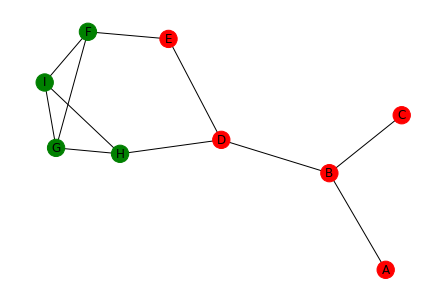

In [101]:
G.nodes['A']['community'] = 0
G.nodes['B']['community'] = 0
G.nodes['C']['community'] = 0
G.nodes['D']['community'] = 0
G.nodes['E']['community'] = 0

G.nodes['F']['community'] = 1
G.nodes['G']['community'] = 1
G.nodes['H']['community'] = 1
G.nodes['I']['community'] = 1

colors = { 0 : 'red', 1 : 'green'}
communities = [colors[G.nodes[node]['community']] for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=communities)

### Common Neighbors - Soundarajan-Hopcroft

In [104]:
cn_soundarajan_hopcroft = list(nx.cn_soundarajan_hopcroft(G))
cn_soundarajan_hopcroft.sort(key=op.itemgetter(2), reverse=True)

print(cn_soundarajan_hopcroft)

[('H', 'F', 4), ('B', 'E', 2), ('A', 'D', 2), ('A', 'C', 2), ('D', 'C', 2), ('B', 'H', 1), ('D', 'G', 1), ('D', 'F', 1), ('D', 'I', 1), ('H', 'E', 1), ('I', 'E', 1), ('G', 'E', 1), ('B', 'F', 0), ('B', 'I', 0), ('B', 'G', 0), ('A', 'H', 0), ('A', 'E', 0), ('A', 'F', 0), ('A', 'G', 0), ('A', 'I', 0), ('H', 'C', 0), ('C', 'G', 0), ('C', 'E', 0), ('C', 'F', 0), ('C', 'I', 0)]


### Resource Allocation - Soundarajan-Hopcroft Index

In [105]:
ra_soundarajan_hopcroft = list(nx.ra_index_soundarajan_hopcroft(G))
ra_soundarajan_hopcroft.sort(key=op.itemgetter(2), reverse=True)

print(ra_soundarajan_hopcroft)

[('H', 'F', 0.6666666666666666), ('B', 'E', 0.3333333333333333), ('A', 'D', 0.3333333333333333), ('A', 'C', 0.3333333333333333), ('D', 'C', 0.3333333333333333), ('B', 'H', 0), ('B', 'F', 0), ('B', 'I', 0), ('B', 'G', 0), ('A', 'H', 0), ('A', 'E', 0), ('A', 'F', 0), ('A', 'G', 0), ('A', 'I', 0), ('D', 'G', 0), ('D', 'F', 0), ('D', 'I', 0), ('H', 'C', 0), ('H', 'E', 0), ('C', 'G', 0), ('C', 'E', 0), ('C', 'F', 0), ('C', 'I', 0), ('I', 'E', 0), ('G', 'E', 0)]
